#### Import necessary library

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Dropout
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from keras.layers import Lambda

### Load Data

In [2]:
data_dir = "C:\\Users\\alan\\AI Project\\dataset\\aclImdb" 

In [3]:
def load_data(path):
  data = []

  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())
      
  return data

Merge all Data into one DataFrame

In [4]:
df_train_pos = pd.DataFrame({'review': load_data(data_dir+"\\train\\pos\\"), 'label': 1})
df_train_neg = pd.DataFrame({'review': load_data(data_dir+"\\train\\neg\\"), 'label': 0})

df_test_pos = pd.DataFrame({'review': load_data(data_dir+"\\test\\pos\\"), 'label': 1})
df_test_neg = pd.DataFrame({'review': load_data(data_dir+"\\test\\neg\\"), 'label': 0})

# Merging all df's for data cleaning and preprocessing step.
data = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)
print("Total reviews in df: ", data.shape)
data.head()

Total reviews in df:  (50000, 2)


,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [5]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
print(train_df,test_df)

                                                  review  label
39087  Ah, here it is! A movie, which is said by peop...      0
30893  I saw this movie on PBS the first time. Then I...      1
45278  At the beginning of 'Loggerheads', we're intro...      0
16398  For the life of me, I cannot get why they woul...      0
13653  I always wrote this series off as being a comp...      0
...                                                  ...    ...
11284  I saw this movie at midnight on On Demand the ...      1
44732  Some aspects of this production are good, such...      0
38158  I was not old enough to really appreciate the ...      0
860    Nice movie with a great soundtrack which spans...      1
15795  Even though this was a made-for-TV production,...      0

[40000 rows x 2 columns]                                                   review  label
33553  When I first saw the ad for this, I was like '...      1
9427   "A Girl's Folly" is a sort of half-comedy, hal...      1
199    I start

In [7]:
x_train = train_df['review'].str.lower().values
y_train = train_df['label'].values

x_test = test_df['review'].str.lower().values
y_test = test_df['label'].values

#### Bag-of-Words

In [8]:
# The BoW and TF-IDF techniques automatically tokenize the text 
# and create feature vectors based on the occurrences of words or word combinations (n-grams) in the text.
bow_vectorizer = CountVectorizer(max_features=20000, ngram_range=(1, 1))
bow_vectorizer.fit(x_train)

x_train_bow = bow_vectorizer.transform(x_train)
x_test_bow = bow_vectorizer.transform(x_test)

#### TF-IDF

In [9]:
tfidf_vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 1))
tfidf_vectorizer.fit(x_train)

x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

### Build Model:

In [10]:
def build_and_train_model(x_train, y_train, x_test, y_test, input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=32,
                        epochs=5,
                        validation_data=(x_test, y_test))
    return model, history

#### model for Bag-of-Words

In [11]:
# convert BoW feature sets
x_train_bow = x_train_bow.toarray()
x_test_bow = x_test_bow.toarray()

In [12]:
input_dim_bow = x_train_bow.shape[1]
model_bow, history_bow = build_and_train_model(x_train_bow, y_train, x_test_bow, y_test, input_dim_bow)

Epoch 1/5
1250/1250 [==============================] - 34s 26ms/step - loss: 0.3141 - accuracy: 0.8707 - val_loss: 0.2550 - val_accuracy: 0.8988
Epoch 2/5
1250/1250 [==============================] - 35s 28ms/step - loss: 0.1700 - accuracy: 0.9332 - val_loss: 0.2787 - val_accuracy: 0.9006
Epoch 3/5
1250/1250 [==============================] - 38s 30ms/step - loss: 0.0931 - accuracy: 0.9645 - val_loss: 0.3226 - val_accuracy: 0.8916
Epoch 4/5
1250/1250 [==============================] - 38s 30ms/step - loss: 0.0484 - accuracy: 0.9838 - val_loss: 0.4820 - val_accuracy: 0.8927
Epoch 5/5
1250/1250 [==============================] - 36s 29ms/step - loss: 0.0342 - accuracy: 0.9879 - val_loss: 0.5553 - val_accuracy: 0.8916


#### model for TF-IDF

In [13]:
# convert TF-IDF feature sets
x_train_tfidf = x_train_tfidf.toarray()
x_test_tfidf = x_test_tfidf.toarray()

In [14]:
input_dim_tfidf = x_train_tfidf.shape[1]
model_tfidf, history_tfidf = build_and_train_model(x_train_tfidf, y_train, x_test_tfidf, y_test, input_dim_tfidf)

Epoch 1/5
1250/1250 [==============================] - 31s 25ms/step - loss: 0.2981 - accuracy: 0.8749 - val_loss: 0.2399 - val_accuracy: 0.9027
Epoch 2/5
1250/1250 [==============================] - 30s 24ms/step - loss: 0.1400 - accuracy: 0.9474 - val_loss: 0.2733 - val_accuracy: 0.8952
Epoch 3/5
1250/1250 [==============================] - 30s 24ms/step - loss: 0.0664 - accuracy: 0.9755 - val_loss: 0.4056 - val_accuracy: 0.8900
Epoch 4/5
1250/1250 [==============================] - 30s 24ms/step - loss: 0.0238 - accuracy: 0.9916 - val_loss: 0.5490 - val_accuracy: 0.8904
Epoch 5/5
1250/1250 [==============================] - 30s 24ms/step - loss: 0.0074 - accuracy: 0.9969 - val_loss: 0.7193 - val_accuracy: 0.8893


#### Evaluate the model: BOW

In [15]:
score_bow, acc_bow = model_bow.evaluate(x_test_bow, y_test, batch_size=32)
print('BoW Model - Test score:', score_bow)
print('BoW Model - Test accuracy:', acc_bow)


313/313 [==============================] - 1s 4ms/step - loss: 0.5553 - accuracy: 0.8916
BoW Model - Test score: 0.555258572101593
BoW Model - Test accuracy: 0.8916000127792358


#### Evaluate the model: TF-IDF

In [16]:
score_tfidf, acc_tfidf = model_tfidf.evaluate(x_test_tfidf, y_test, batch_size=32)
print('TF-IDF Model - Test score:', score_tfidf)
print('TF-IDF Model - Test accuracy:', acc_tfidf)

313/313 [==============================] - 1s 3ms/step - loss: 0.7193 - accuracy: 0.8893
TF-IDF Model - Test score: 0.7193324565887451
TF-IDF Model - Test accuracy: 0.8892999887466431


In [17]:
print("BoW Training History:")
print(history_bow.history)

BoW Training History:
{'loss': [0.3140729069709778, 0.16996140778064728, 0.09306232631206512, 0.04842456430196762, 0.03424112871289253], 'accuracy': [0.8707000017166138, 0.9332249760627747, 0.9644500017166138, 0.9837750196456909, 0.9878749847412109], 'val_loss': [0.25499334931373596, 0.27872610092163086, 0.3226114809513092, 0.48196327686309814, 0.555258572101593], 'val_accuracy': [0.8988000154495239, 0.900600016117096, 0.8916000127792358, 0.8927000164985657, 0.8916000127792358]}


In [18]:
print("\nTF-IDF Training History:")
print(history_tfidf.history)


TF-IDF Training History:
{'loss': [0.2980929911136627, 0.13996461033821106, 0.0663597509264946, 0.02376333810389042, 0.007375917863100767], 'accuracy': [0.874875009059906, 0.9474499821662903, 0.9755250215530396, 0.9915750026702881, 0.9969249963760376], 'val_loss': [0.2398533970117569, 0.27327674627304077, 0.40556296706199646, 0.5489850044250488, 0.7193324565887451], 'val_accuracy': [0.9027000069618225, 0.8952000141143799, 0.8899999856948853, 0.8903999924659729, 0.8892999887466431]}


#### Accuracy

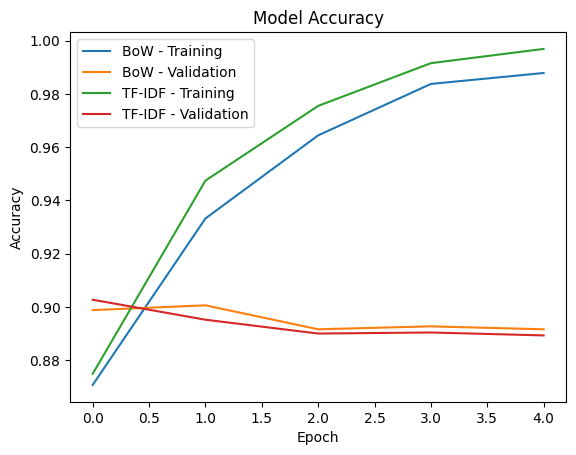

In [19]:
# Plot accuracy
plt.figure()
plt.plot(history_bow.history['accuracy'], label='BoW - Training')
plt.plot(history_bow.history['val_accuracy'], label='BoW - Validation')
plt.plot(history_tfidf.history['accuracy'], label='TF-IDF - Training')
plt.plot(history_tfidf.history['val_accuracy'], label='TF-IDF - Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

#### Loss

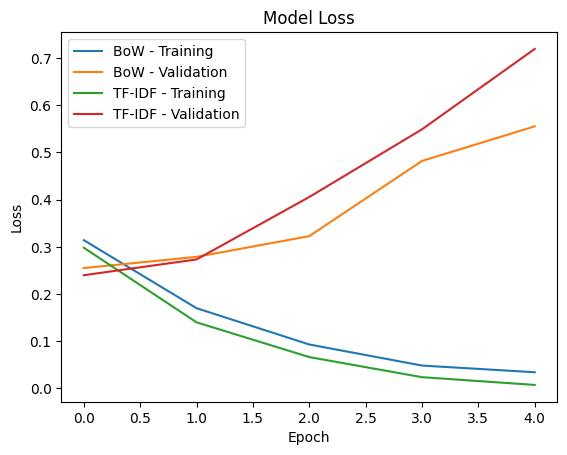

In [20]:
plt.figure()
plt.plot(history_bow.history['loss'], label='BoW - Training')
plt.plot(history_bow.history['val_loss'], label='BoW - Validation')
plt.plot(history_tfidf.history['loss'], label='TF-IDF - Training')
plt.plot(history_tfidf.history['val_loss'], label='TF-IDF - Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()